# Fianl Project

NewBee

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pygam import LinearGAM, LogisticGAM, s, f
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

# lr
from sklearn.linear_model import LogisticRegression

# lda qda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_OHXREF.htm      
https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_SMQ.htm#SMD100FL

## Preprocessing - NaN

In [2]:
# oral_health
oral_health = pd.read_sas('P_OHXREF.XPT', format='xport')

In [3]:
oral_health.head()

,SEQN,OHDEXSTS,OHDRCSTS,OHAREC,OHAROCDT,OHAROCGP,OHAROCOH,OHAROCCI,OHAROCDE,OHARNF,OHAROTH,OHAPOS
0,109263.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
1,109264.0,1.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
2,109265.0,1.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
3,109266.0,1.0,1.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
4,109269.0,1.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0


In [4]:
oral_health.drop(columns=['OHDEXSTS','OHDRCSTS','OHAROCDT','OHAROCGP','OHAROCOH','OHAROCCI','OHAROCDE','OHARNF','OHAROTH','OHAPOS'], inplace=True)
oral_health.dropna(subset=['OHAREC'], inplace=True)

In [5]:
oral_health.head()

,SEQN,OHAREC
0,109263.0,3.0
1,109264.0,4.0
2,109265.0,4.0
3,109266.0,3.0
4,109269.0,4.0


In [6]:
oral_health.describe()

,SEQN,OHAREC
count,13276.000000,13276.000000
mean,117092.839937,3.590163
std,4500.752840,0.563355
min,109263.000000,1.000000
25%,113195.500000,3.000000
50%,117125.500000,4.000000
75%,121000.250000,4.000000
max,124821.000000,4.000000


In [7]:
oral_health.shape

(13276, 2)

In [8]:
# smoking
smoking = pd.read_sas('P_SMQ.XPT', format='xport')

In [9]:
smoking.head()

,SEQN,SMQ020,SMD030,SMQ040,SMQ050Q,SMQ050U,SMD057,SMQ078,SMD641,SMD650,SMD100FL,SMD100MN,SMQ670,SMQ621,SMD630,SMAQUEX2
0,109264.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
1,109266.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,109267.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,109268.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,109271.0,1.0,18.0,1.0,NaN,NaN,NaN,2.0,30.0,20.0,NaN,NaN,1.0,NaN,NaN,1.0


In [10]:
# smoking
smoking = smoking[smoking['SMAQUEX2'] == 1] # choose people older than 18 years old
smoking.drop(columns=['SMQ050Q','SMQ050U','SMQ621','SMD630','SMAQUEX2'], inplace=True)

In [11]:
smoking.head()

,SEQN,SMQ020,SMD030,SMQ040,SMD057,SMQ078,SMD641,SMD650,SMD100FL,SMD100MN,SMQ670
1,109266.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109267.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109268.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,109271.0,1.0,18.0,1.0,NaN,2.0,30.0,20.0,NaN,NaN,1.0
5,109273.0,1.0,18.0,1.0,NaN,1.0,30.0,15.0,1.0,1.0,1.0


In [12]:
smoking.describe()

,SEQN,SMQ020,SMD030,SMQ040,SMD057,SMQ078,SMD641,SMD650,SMD100FL,SMD100MN,SMQ670
count,9693.000000,9693.000000,3.889000e+03,3889.000000,2205.000000,1273.000000,1.684000e+03,1665.000000,1.592000e+03,1.592000e+03,1684.00000
mean,117075.170329,1.601981,2.292800e+01,2.231165,21.978685,2.628437,2.559501e+01,14.734535,1.011307e+00,5.031407e-01,1.46734
std,4488.053213,0.512981,6.976374e+01,0.921729,82.115711,3.705050,9.649588e+00,62.674692,5.099861e-01,5.836578e-01,0.49908
min,109266.000000,1.000000,5.397605e-79,1.000000,1.000000,1.000000,5.397605e-79,1.000000,5.397605e-79,5.397605e-79,1.00000
25%,113201.000000,1.000000,1.500000e+01,1.000000,5.000000,1.000000,2.500000e+01,4.000000,1.000000e+00,5.397605e-79,1.00000
50%,117037.000000,2.000000,1.700000e+01,3.000000,10.000000,2.000000,3.000000e+01,10.000000,1.000000e+00,5.397605e-79,1.00000
75%,120969.000000,2.000000,2.000000e+01,3.000000,20.000000,3.000000,3.000000e+01,15.000000,1.000000e+00,1.000000e+00,2.00000
max,124822.000000,9.000000,9.990000e+02,3.000000,999.000000,99.000000,9.900000e+01,999.000000,9.000000e+00,9.000000e+00,2.00000


In [13]:
smoking.shape

(9693, 11)

## Preprocessing - merge

In [14]:
data = pd.merge(oral_health, smoking, on='SEQN')
data.head()

,SEQN,OHAREC,SMQ020,SMD030,SMQ040,SMD057,SMQ078,SMD641,SMD650,SMD100FL,SMD100MN,SMQ670
0,109266.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109271.0,3.0,1.0,18.0,1.0,NaN,2.0,30.0,20.0,NaN,NaN,1.0
2,109273.0,4.0,1.0,18.0,1.0,NaN,1.0,30.0,15.0,1.0,1.0,1.0
3,109274.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,109282.0,4.0,1.0,18.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.shape

(8571, 12)

In [16]:
# corr
data_corr = data[["OHAREC","SMQ020"]]
data_corr = data_corr[data_corr['SMQ020'].isin([1, 2])]
data_corr.head()

,OHAREC,SMQ020
0,3.0,2.0
1,3.0,1.0
2,4.0,1.0
3,3.0,2.0
4,4.0,1.0


In [17]:
data_corr.shape

(8569, 2)

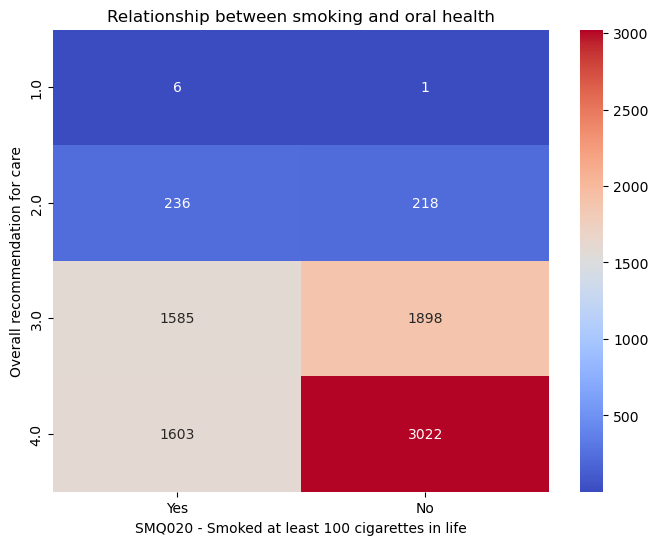

In [18]:
cross_tab = pd.crosstab(data_corr['OHAREC'], data_corr['SMQ020'])

plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='g')
plt.title('Relationship between smoking and oral health')
plt.xticks(ticks=[0.5, 1.5], labels=['Yes', 'No'])
plt.xlabel('SMQ020 - Smoked at least 100 cigarettes in life')
plt.ylabel('Overall recommendation for care')
plt.show()

## Pick the Smoking People

In [19]:
data_sm = data[data['SMQ020'] == 1]
data_sm.head()

,SEQN,OHAREC,SMQ020,SMD030,SMQ040,SMD057,SMQ078,SMD641,SMD650,SMD100FL,SMD100MN,SMQ670
1,109271.0,3.0,1.0,18.0,1.0,NaN,2.0,30.0,20.0,NaN,NaN,1.0
2,109273.0,4.0,1.0,18.0,1.0,NaN,1.0,30.0,15.0,1.0,1.0,1.0
4,109282.0,4.0,1.0,18.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
16,109307.0,3.0,1.0,22.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
21,109317.0,3.0,1.0,27.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data_sm.describe()

,SEQN,OHAREC,SMQ020,SMD030,SMQ040,SMD057,SMQ078,SMD641,SMD650,SMD100FL,SMD100MN,SMQ670
count,3430.000000,3430.000000,3430.0,3.430000e+03,3430.000000,1944.000000,1116.000000,1.486000e+03,1468.000000,1.404000e+03,1.404000e+03,1486.000000
mean,117232.786589,3.395044,1.0,2.298805e+01,2.232070,20.859568,2.574373,2.559556e+01,14.461172,1.014957e+00,5.056980e-01,1.464334
std,4491.104342,0.622256,0.0,7.038887e+01,0.920787,75.156583,3.222793,9.806750e+00,61.513953,5.410359e-01,5.939553e-01,0.498894
min,109271.000000,1.000000,1.0,5.397605e-79,1.000000,1.000000,1.000000,5.397605e-79,1.000000,5.397605e-79,5.397605e-79,1.000000
25%,113306.500000,3.000000,1.0,1.500000e+01,1.000000,5.000000,1.000000,2.500000e+01,4.000000,1.000000e+00,5.397605e-79,1.000000
50%,117314.000000,3.000000,1.0,1.700000e+01,3.000000,10.000000,2.000000,3.000000e+01,10.000000,1.000000e+00,5.397605e-79,1.000000
75%,121183.250000,4.000000,1.0,2.000000e+01,3.000000,20.000000,3.000000,3.000000e+01,15.000000,1.000000e+00,1.000000e+00,2.000000
max,124815.000000,4.000000,1.0,9.990000e+02,3.000000,999.000000,99.000000,9.900000e+01,999.000000,9.000000e+00,9.000000e+00,2.000000


In [21]:
data_sm.shape

(3430, 12)

### more data preprocessing

In [22]:
data_sm_filtered = data_sm[~((data_sm['SMD030'].isin([777, 999])) | 
                            (data_sm['SMD057'].isin([777, 999])) | 
                            (data_sm['SMQ078'].isin([77, 99])) | 
                            (data_sm['SMD641'].isin([77, 99])) | 
                            (data_sm['SMD650'].isin([777, 999])) | 
                            (data_sm['SMD100FL'].isin([7, 9])) | 
                            (data_sm['SMD100MN'].isin([7, 9]))
                            )]

In [23]:
data_sm_filtered.head()

,SEQN,OHAREC,SMQ020,SMD030,SMQ040,SMD057,SMQ078,SMD641,SMD650,SMD100FL,SMD100MN,SMQ670
1,109271.0,3.0,1.0,18.0,1.0,NaN,2.0,30.0,20.0,NaN,NaN,1.0
2,109273.0,4.0,1.0,18.0,1.0,NaN,1.0,30.0,15.0,1.0,1.0,1.0
4,109282.0,4.0,1.0,18.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
16,109307.0,3.0,1.0,22.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
21,109317.0,3.0,1.0,27.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data_sm_filtered.describe()

,SEQN,OHAREC,SMQ020,SMD030,SMQ040,SMD057,SMQ078,SMD641,SMD650,SMD100FL,SMD100MN,SMQ670
count,3389.000000,3389.000000,3389.0,3.389000e+03,3389.000000,1924.000000,1108.000000,1.465000e+03,1453.000000,1.385000e+03,1.385000e+03,1465.000000
mean,117248.553556,3.395397,1.0,1.790617e+01,2.231337,15.290021,2.491877,2.536997e+01,10.586373,9.812274e-01,4.916968e-01,1.465529
std,4493.378522,0.622807,0.0,6.365820e+00,0.922408,14.229458,1.430386,8.700444e+00,8.317247,1.357699e-01,5.001116e-01,0.498981
min,109271.000000,1.000000,1.0,5.397605e-79,1.000000,1.000000,1.000000,5.397605e-79,1.000000,5.397605e-79,5.397605e-79,1.000000
25%,113324.000000,3.000000,1.0,1.500000e+01,1.000000,5.000000,1.000000,2.500000e+01,4.000000,1.000000e+00,5.397605e-79,1.000000
50%,117339.000000,3.000000,1.0,1.700000e+01,3.000000,10.000000,2.000000,3.000000e+01,10.000000,1.000000e+00,5.397605e-79,1.000000
75%,121227.000000,4.000000,1.0,2.000000e+01,3.000000,20.000000,3.000000,3.000000e+01,15.000000,1.000000e+00,1.000000e+00,2.000000
max,124815.000000,4.000000,1.0,7.600000e+01,3.000000,95.000000,7.000000,3.000000e+01,95.000000,1.000000e+00,1.000000e+00,2.000000


In [25]:
data_sm_filtered.shape

(3389, 12)

### use mean() to replace NaN

In [26]:
data_sm_filtered.fillna(round(data_sm_filtered.mean(),0), inplace=True)
data_sm_filtered.head()

/var/folders/rs/36nqgblj1kjdcb97hkj9tgd00000gn/T/ipykernel_40913/676734610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sm_filtered.fillna(round(data_sm_filtered.mean(),0), inplace=True)


,SEQN,OHAREC,SMQ020,SMD030,SMQ040,SMD057,SMQ078,SMD641,SMD650,SMD100FL,SMD100MN,SMQ670
1,109271.0,3.0,1.0,18.0,1.0,15.0,2.0,30.0,20.0,1.0,0.0,1.0
2,109273.0,4.0,1.0,18.0,1.0,15.0,1.0,30.0,15.0,1.0,1.0,1.0
4,109282.0,4.0,1.0,18.0,3.0,10.0,2.0,25.0,11.0,1.0,0.0,1.0
16,109307.0,3.0,1.0,22.0,3.0,5.0,2.0,25.0,11.0,1.0,0.0,1.0
21,109317.0,3.0,1.0,27.0,3.0,3.0,2.0,25.0,11.0,1.0,0.0,1.0


In [27]:
data_sm_filtered.describe()

,SEQN,OHAREC,SMQ020,SMD030,SMQ040,SMD057,SMQ078,SMD641,SMD650,SMD100FL,SMD100MN,SMQ670
count,3389.000000,3389.000000,3389.0,3.389000e+03,3389.000000,3389.000000,3389.000000,3.389000e+03,3389.000000,3.389000e+03,3.389000e+03,3389.000000
mean,117248.553556,3.395397,1.0,1.790617e+01,2.231337,15.164650,2.160814,2.515993e+01,10.822662,9.923281e-01,2.009442e-01,1.201239
std,4493.378522,0.622807,0.0,6.365820e+00,0.922408,10.721247,0.849570,5.722202e+00,5.448764,8.726551e-02,4.007656e-01,0.400986
min,109271.000000,1.000000,1.0,5.397605e-79,1.000000,1.000000,1.000000,5.397605e-79,1.000000,5.397605e-79,0.000000e+00,1.000000
25%,113324.000000,3.000000,1.0,1.500000e+01,1.000000,10.000000,2.000000,2.500000e+01,10.000000,1.000000e+00,0.000000e+00,1.000000
50%,117339.000000,3.000000,1.0,1.700000e+01,3.000000,15.000000,2.000000,2.500000e+01,11.000000,1.000000e+00,0.000000e+00,1.000000
75%,121227.000000,4.000000,1.0,2.000000e+01,3.000000,15.000000,2.000000,3.000000e+01,11.000000,1.000000e+00,5.397605e-79,1.000000
max,124815.000000,4.000000,1.0,7.600000e+01,3.000000,95.000000,7.000000,3.000000e+01,95.000000,1.000000e+00,1.000000e+00,2.000000


In [28]:
X = data_sm_filtered.drop(columns=['OHAREC','SEQN','SMQ020'])
y = data_sm_filtered["OHAREC"]

In [35]:
X.head()

,SMD030,SMQ040,SMD057,SMQ078,SMD641,SMD650,SMD100FL,SMD100MN,SMQ670
1,18.0,1.0,15.0,2.0,30.0,20.0,1.0,0.0,1.0
2,18.0,1.0,15.0,1.0,30.0,15.0,1.0,1.0,1.0
4,18.0,3.0,10.0,2.0,25.0,11.0,1.0,0.0,1.0
16,22.0,3.0,5.0,2.0,25.0,11.0,1.0,0.0,1.0
21,27.0,3.0,3.0,2.0,25.0,11.0,1.0,0.0,1.0


In [30]:
y.head()

1     3.0
2     4.0
4     4.0
16    3.0
21    3.0
Name: OHAREC, dtype: float64

### collinearity

In [148]:
X.corr()

,SMD030,SMQ040,SMD057,SMQ078,SMD641,SMD650,SMD100FL,SMD100MN,SMQ670
SMD030,1.000000,-0.023496,-0.042558,0.072539,-0.023305,-0.129041,0.002954,0.063852,-0.038506
SMQ040,-0.023496,1.000000,0.012801,-0.252760,-0.284489,-0.083977,0.088058,-0.538581,-0.603108
SMD057,-0.042558,0.012801,1.000000,-0.002908,-0.000429,0.000500,0.001351,-0.007702,-0.007710
SMQ078,0.072539,-0.252760,-0.002908,1.000000,0.091791,-0.252901,-0.035110,0.117452,0.060064
SMD641,-0.023305,-0.284489,-0.000429,0.091791,1.000000,0.372579,0.043834,-0.003979,0.195261
SMD650,-0.129041,-0.083977,0.000500,-0.252901,0.372579,1.000000,0.003966,-0.157230,0.160077
SMD100FL,0.002954,0.088058,0.001351,-0.035110,0.043834,0.003966,1.000000,-0.048743,-0.023346
SMD100MN,0.063852,-0.538581,-0.007702,0.117452,-0.003979,-0.157230,-0.048743,1.000000,0.253383
SMQ670,-0.038506,-0.603108,-0.007710,0.060064,0.195261,0.160077,-0.023346,0.253383,1.000000


## GAM

https://github.com/dswah/pyGAM/pull/213

In [74]:
gam = LogisticGAM(f(0) + f(1) + f(2) + f(3) + f(4) + f(5) + f(6) + f(7) + f(8), n_splines=5)
ensemble = OneVsRestClassifier(gam, n_jobs=1)
ensemble.fit(X, y)

OneVsRestClassifier(estimator=LogisticGAM(callbacks=['deviance', 'diffs', 'accuracy'], 
   fit_intercept=True, max_iter=100, n_splines=5, 
   terms=f(0) + f(1) + f(2) + f(3) + f(4) + f(5) + f(6) + f(7) + f(8),
   tol=0.0001, verbose=False),
                    n_jobs=1)

In [75]:
ensemble.predict_proba(X)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
gam.summary()

In [ ]:
lams = [np.array([0.5, 1, 5, 10])] * 3
gam.gridsearch(X, y, lam=lams)

In [ ]:
gam.lam

## Linear Regression lasso/ridge

### Preprocessing - onehotcoder

In [36]:
X_need_encode = X[["SMQ040", "SMQ078", "SMD100FL", "SMD100MN", "SMQ670"]]
encoder = OneHotEncoder()
X_need_encoded = encoder.fit_transform(X_need_encode)

In [43]:
X_need_encoded_pro = pd.DataFrame(X_need_encoded.toarray())
X_need_encoded_pro.index = X.index
stt = []
for i in X_need_encoded_pro.columns:
    stt.append(str(i))
X_need_encoded_pro.columns = stt
X_need_encoded_pro.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
16,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
21,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [44]:
X_left = X.drop(["SMQ040", "SMQ078", "SMD100FL", "SMD100MN", "SMQ670"], axis=1)
X_encoded = pd.concat([X_need_encoded_pro, X_left], axis=1)
X_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,SMD030,SMD057,SMD641,SMD650
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,18.0,15.0,30.0,20.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,18.0,15.0,30.0,15.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,18.0,10.0,25.0,11.0
16,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,22.0,5.0,25.0,11.0
21,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,27.0,3.0,25.0,11.0


### Logistic + ridge

In [147]:
rdg = LogisticRegression(penalty='l2', multi_class='multinomial', C=1, max_iter = 5000)
rdg.fit(X_encoded, y)

LogisticRegression(C=1, max_iter=5000, multi_class='multinomial')

In [137]:
rdg.score(X_encoded, y)

0.565063440542933

In [138]:
y_pred = rdg.predict(X_encoded)
(y_pred != y).mean()

0.434936559457067

In [141]:
rdg.coef_

array([[-1.08817627e-01, -4.11336525e-03,  1.14152353e-01,
        -2.89283980e-02,  6.53958988e-02, -1.82177085e-02,
        -8.28842310e-03, -4.54003955e-03, -1.41288067e-03,
        -2.78708804e-03, -4.49847060e-03,  5.71983160e-03,
         9.41858769e-02, -9.13552702e-02, -1.60924578e-03,
         7.94498518e-02, -7.82284908e-02, -1.51796178e-02,
        -2.17429114e-02, -5.03628048e-02,  2.12581776e-02],
       [ 3.20952537e-01,  5.28272115e-02, -3.43749113e-01,
         6.40181140e-02,  1.13310419e-01,  6.14334235e-02,
         7.21062503e-02, -1.12589429e-01, -2.75877381e-02,
        -1.40660404e-01, -1.44239489e-01,  1.74270124e-01,
         4.84415340e-02, -3.88639370e-02,  2.04530382e-02,
        -8.68642780e-02,  1.16894913e-01,  1.32964539e-02,
         1.21119538e-02,  1.64946892e-02,  1.52665681e-03],
       [ 2.50991616e-02, -5.15401136e-02,  1.01869063e-02,
         9.34234771e-02, -4.85559771e-02,  3.72651240e-02,
         1.74626159e-02, -2.19104922e-02,  1.31546678e

In [142]:
rdg.intercept_

array([-2.31432952, -1.05304564,  1.60230085,  1.76507432])

In [146]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

logreg = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial', max_iter=5000)
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_encoded, y)

grid_search.best_params_['C']

1

### Logistic + lasso

In [115]:
lasso = LogisticRegression(penalty='l1', solver = 'saga', multi_class='multinomial', max_iter = 5000)
lasso.fit(X_encoded, y)

LogisticRegression(max_iter=5000, multi_class='multinomial', penalty='l1',
                   solver='saga')

In [116]:
lasso.score(X_encoded, y)

0.5644732959575096

In [117]:
y_pred = lasso.predict(X_encoded)
(y_pred != y).mean()

0.4355267040424904

## LDA QDA

In [144]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_encoded, y)

/Users/xiaojiewang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [145]:
y_pred = qda.predict(X_encoded)
(y_pred != y).mean()

0.45677190911773385

## XGBoost

In [149]:
import xgboost as xgb

In [150]:
dtrain = xgb.DMatrix(X_encoded, label=y)

params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': 3,  # Number of classes in the target variable
    'max_depth': 3,  # Maximum depth of the tree
    'eta': 0.3,  # Learning rate
    'eval_metric': 'merror'  # Evaluation metric: multi-class classification error
}

num_rounds = 1000  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

XGBoostError: [17:09:02] /Users/runner/work/xgboost/xgboost/src/objective/multiclass_obj.cu:123: SoftmaxMultiClassObj: label must be in [0, num_class).
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x00000001324f0994 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x00000001326bc7b0 xgboost::obj::SoftmaxMultiClassObj::GetGradient(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, int, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float>>*) + 844
  [bt] (2) 3   libxgboost.dylib                    0x00000001326386bc xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 652
  [bt] (3) 4   libxgboost.dylib                    0x0000000132510ea4 XGBoosterUpdateOneIter + 144
  [bt] (4) 5   libffi.8.dylib                      0x000000010545804c ffi_call_SYSV + 76
  [bt] (5) 6   libffi.8.dylib                      0x0000000105455834 ffi_call_int + 1404
  [bt] (6) 7   _ctypes.cpython-311-darwin.so       0x0000000105438150 _ctypes_callproc + 752
  [bt] (7) 8   _ctypes.cpython-311-darwin.so       0x00000001054324b4 PyCFuncPtr_call + 228
  [bt] (8) 9   python3.11                          0x0000000104581034 _PyEval_EvalFrameDefault + 197300

